# Twitter Sentiment Analysis

- Here we analyse the sentiment by define intervel as per user.
- we can calculate the very small detail of any topic by defining its interval
- Useful for sales analysis, product reviews, demand of things as per regions, etc..
- Need Twitter development account


## Importing the Library

In [3]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob
import sys, csv, re

### Defining the class and preprocess the Tweet for Analysis

In [10]:
class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        consumerKey = 'Enter Here'
        consumerSecret = 'Enter Here'
        accessToken = 'Enter Here'
        accessTokenSecret = 'Enter Here'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        week_positive = 0
        strong_positive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
             #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later
            
            #ploarity lie between -1 and 1
            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                week_positive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                strong_positive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1
            #we can also break the interval as per precision and requirement

        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        week_positive = self.percentage(week_positive, NoOfTerms)
        strong_positive = self.percentage(strong_positive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(week_positive) + "% people thought it was weakly positive")
        print(str(strong_positive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, week_positive, strong_positive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)
    
    #clean the Tweet removing the link, special characters, etc..
    def cleanTweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w +:\ / \ / \S +)", " ", tweet).split())
    
    # calculate the percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')
    
    #Analyse the tweet by pie chart
    def plotPieChart(self, positive, week_positive, strong_positive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(week_positive) + '%]',
                  'Strongly Positive [' + str(strong_positive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
                  'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, week_positive, strong_positive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

### Creating the object and calling the function 

Enter Keyword/Tag to search about: Bitcoin
Enter how many tweets to search: 1000
How people are reacting on Bitcoin by analyzing 1000 tweets.

General Report: 
Weakly Positive

Detailed Report: 
15.40% people thought it was positive
19.60% people thought it was weakly positive
4.40% people thought it was strongly positive
2.30% people thought it was negative
9.30% people thought it was weakly negative
0.90% people thought it was strongly negative
48.00% people thought it was neutral


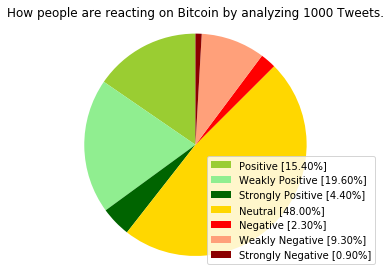

In [12]:
if __name__ == "__main__":
    sentiment = SentimentAnalysis()
    sentiment.DownloadData()

### Pie chart help to view the people reaction in tweet very well

### Sentiment and polarity lie between -1 and 1.